In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

In [15]:
#플롯에서 한글이 깨지는 경우가 없도록 폰트 지정
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## 데이터 정규화

In [3]:
scaler = MinMaxScaler()

In [10]:
df = pd.read_csv('Add_Class_청년인구_인프라수.csv', encoding='cp949')

df = df.drop('Unnamed: 0',axis=1)

df_city = df['시군구']
df_Class = df['Class']
df_data = df.drop(['시군구','Class'], axis=1)

df_data.head()

,청년인구,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널,인프라수
0,32943,496,28,3,60,0,1,23,5730,24,201,0,19,0,367,0,6952
1,28277,572,16,2,48,0,1,17,5383,62,281,1,18,0,77,0,6478
2,52554,319,19,1,47,0,1,9,5056,23,104,9,18,1,48,0,5655
3,67271,457,21,2,69,0,1,10,4562,22,62,3,19,0,31,0,5259
4,91126,558,76,3,76,0,1,12,5609,26,66,0,17,0,25,1,6470


In [35]:
df_data[:] = scaler.fit_transform(df_data[:])
df_data.head()

,청년인구,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널,인프라수,intercept
0,0.191345,0.172503,0.052846,0.500000,0.258427,0.0,0.5,1.00,0.346292,0.387097,0.582278,0.0,0.521739,0.000000,1.000000,0.00,0.331672,0.0
1,0.160995,0.200516,0.004065,0.333333,0.191011,0.0,0.5,0.70,0.322245,1.000000,0.835443,0.1,0.478261,0.000000,0.207650,0.00,0.304525,0.0
2,0.318906,0.107261,0.016260,0.166667,0.185393,0.0,0.5,0.30,0.299584,0.370968,0.275316,0.9,0.478261,0.166667,0.128415,0.00,0.257388,0.0
3,0.414634,0.158128,0.024390,0.333333,0.308989,0.0,0.5,0.35,0.265350,0.354839,0.142405,0.3,0.521739,0.000000,0.081967,0.00,0.234708,0.0
4,0.569801,0.195356,0.247967,0.500000,0.348315,0.0,0.5,0.45,0.337907,0.419355,0.155063,0.0,0.434783,0.000000,0.065574,0.25,0.304066,0.0


sns.pairplot(df_data[['청년인구', '소형상업시설(음식점_카페_학원_편의점)', '숙박시설', '행정기관', '문화시설_영화/공연/미술관박물관']]);

## 다중공선성 확인

In [17]:
#회귀분석에서 소형상업시설, 숙박시설, 행정기관, 문화시설이 유의미한 영향이 있다고 확인
df_data['intercept'] = 1
lm = sm.OLS(df_data['청년인구'], df_data[['소형상업시설(음식점_카페_학원_편의점)', '숙박시설', '행정기관', '문화시설_영화/공연/미술관박물관']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   청년인구   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              253.0
Date:                Mon, 16 Aug 2021   Prob (F-statistic):                    3.35e-41
Time:                        17:35:45   Log-Likelihood:                          57.385
No. Observations:                  75   AIC:                                     -106.8
Df Residuals:                      71   BIC:                                     -97.50
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
소형상업시설(음식점_카페_학원_편의점)     0.7471      0.121      6.161      0.000       0.505       0.989
숙박시설                     -0.1581      0.056     -2.833      0.006      -0.269      -0.047
행정기관                      0.4624      0.080      5.784      0.000       0.303       0.622
문화시설_영화/공연/미술관박물관        -0.2874      0.120     -2.394      0.019      -0.527      -0.048
==============================================================================
Omnibus:                        9.059   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               10.757
Skew:                           0.554   Prob(JB):                      0.00461
Kurtosis:                       4.489   Cond. No.                         7.24
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm.exog_names

['소형상업시설(음식점_카페_학원_편의점)', '숙박시설', '행정기관', '문화시설_영화/공연/미술관박물관']

In [27]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(lm.exog, i)} 
             for i, column in enumerate(lm.exog_names)
                 if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,소형상업시설(음식점_카페_학원_편의점),9.847976
1,숙박시설,2.242281
2,행정기관,9.042207
3,문화시설_영화/공연/미술관박물관,1.520516


In [37]:
lm = sm.OLS(df_data['청년인구'], df_data[['숙박시설', '행정기관', '문화시설_영화/공연/미술관박물관']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   청년인구   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                              214.5
Date:                Mon, 16 Aug 2021   Prob (F-statistic):                    8.10e-36
Time:                        17:55:36   Log-Likelihood:                          41.325
No. Observations:                  75   AIC:                                     -76.65
Df Residuals:                      72   BIC:                                     -69.70
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
숙박시설                 -0.0903      0.067     -1.342      0.184      -0.224       0.044
행정기관                  0.8940      0.047     18.873      0.000       0.800       0.988
문화시설_영화/공연/미술관박물관    -0.1540      0.145     -1.060      0.293      -0.444       0.136
==============================================================================
Omnibus:                        0.513   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.576
Skew:                           0.187   Prob(JB):                        0.750
Kurtosis:                       2.788   Cond. No.                         5.20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(lm.exog, i)} 
             for i, column in enumerate(lm.exog_names)
                 if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

#행정기관과 소형상업시설의 상관관게가 너무 높아 소형상업시설은 빼고 구함

,컬럼,VIF
0,숙박시설,2.155128
1,행정기관,2.098069
2,문화시설_영화/공연/미술관박물관,1.471060


# K-means

In [67]:
#정규화된 데이터에 시군구 붙여줌
nol_df = pd.concat([df_city, df_data], axis = 1)
nol_df.head()

,시군구,청년인구,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널,인프라수,intercept
0,서울_종로구,0.191345,0.172503,0.052846,0.500000,0.258427,0.0,0.5,1.00,0.346292,0.387097,0.582278,0.0,0.521739,0.000000,1.000000,0.00,0.331672,0.0
1,서울_중구,0.160995,0.200516,0.004065,0.333333,0.191011,0.0,0.5,0.70,0.322245,1.000000,0.835443,0.1,0.478261,0.000000,0.207650,0.00,0.304525,0.0
2,서울_용산구,0.318906,0.107261,0.016260,0.166667,0.185393,0.0,0.5,0.30,0.299584,0.370968,0.275316,0.9,0.478261,0.166667,0.128415,0.00,0.257388,0.0
3,서울_성동구,0.414634,0.158128,0.024390,0.333333,0.308989,0.0,0.5,0.35,0.265350,0.354839,0.142405,0.3,0.521739,0.000000,0.081967,0.00,0.234708,0.0
4,서울_광진구,0.569801,0.195356,0.247967,0.500000,0.348315,0.0,0.5,0.45,0.337907,0.419355,0.155063,0.0,0.434783,0.000000,0.065574,0.25,0.304066,0.0


### 청년인구 - 숙박시설

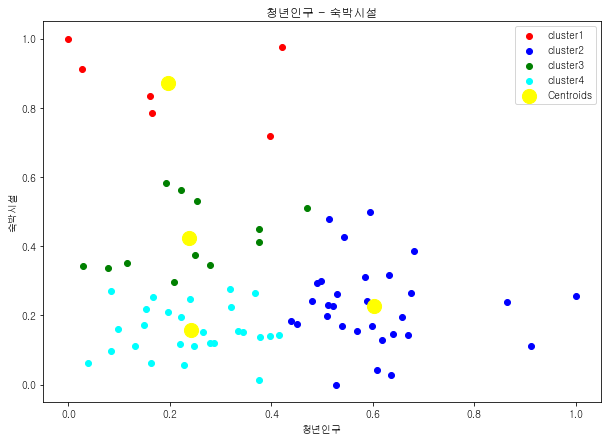

In [200]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import random as rd

#청년인구와 숙박시설의 값만 X_rest
X_rest = nol_df.iloc[:, [1,11]].values # shape=(75,2)
m_rest=X_rest.shape[0] # 집합 개수 (m=75)
n_rest=X_rest.shape[1] # 특징 개수 (n=2)

K = 4 #클러스터 갯수
n_iter = 200 #반복횟수

Centroids=np.array([]).reshape(n_rest,0) # 클러스터 중심 초기화  # shape=(2, 0)
for i in range(K): # 0, 1, 2, 3
    rand=rd.randint(0,m_rest-1) # 0과 74 사이 난수 생성
    Centroids=np.c_[Centroids,X_rest[rand]] # 클러스터 중심(열) 추가
# K개 클러스터 중심 초기값

Output={} #출력값 초기화

for i in range(n_iter): # n_iter 반복 횟수
    # 유클리드 거리가 최소가 되는 K 클러스터 할당
    EuclidianDistance=np.array([]).reshape(m_rest,0) 
    for k in range(K):     
        tempDist=np.sum((X_rest-Centroids[:,k])**2,axis=1) # shape=(75,)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist] # shape=(75, 3)
    C=np.argmin(EuclidianDistance,axis=1)+1 # shape=(75,)
    # K 클러스터 갱신
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0) # Y 딕셔너리 키, 값 할당
    for i in range(m_rest):
        Y[C[i]]=np.c_[Y[C[i]],X_rest[i]] # Y 딕셔너리 키(K클러스터), 값(청년인구, 숙박시설) 할당
    for k in range(K):
        Y[k+1]=Y[k+1].T # 전치행렬
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0) # K 클러스터 중심 갱신
    Output=Y
    
plt.figure(figsize=(10,7))
    
#할때마다 군집의 형태가 바뀜
color=['red','blue','green','cyan']
labels=['cluster1','cluster2','cluster3','cluster4']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k]) #각 데이터의 점 찍기
plt.scatter(Centroids[0,:],Centroids[1,:],s=200,c='yellow',label='Centroids') #Centroids 점 찍는 plt
plt.title("청년인구 - 숙박시설")
plt.xlabel('청년인구')
plt.ylabel('숙박시설')
plt.legend()
plt.show()

### 청년인구 - 행정기관

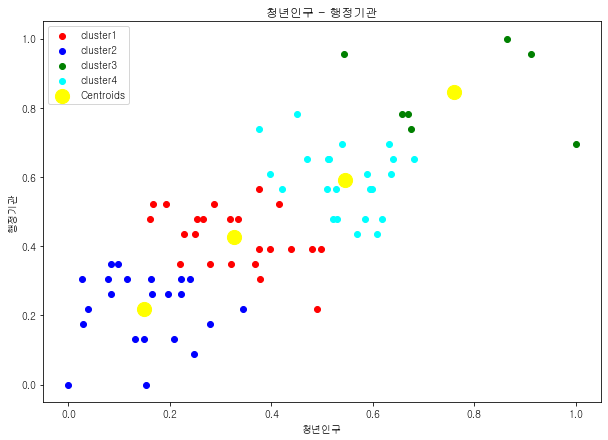

In [201]:
#청년인구와 행정기관의 값만 X_Exe
X_Exe = nol_df.iloc[:, [1,13]].values # shape=(75,2)
m_Exe=X_Exe.shape[0] # 집합 개수 (m=75)
n_Exe=X_Exe.shape[1] # 특징 개수 (n=2)

K = 4 #클러스터 갯수
n_iter = 200 #반복횟수

Centroids=np.array([]).reshape(n_Exe,0) # 클러스터 중심 초기화  # shape=(2, 0)
for i in range(K): # 0, 1, 2, 3
    rand=rd.randint(0,m_Exe-1) # 0과 74 사이 난수 생성
    Centroids=np.c_[Centroids,X_Exe[rand]] # 클러스터 중심(열) 추가
# K개 클러스터 중심 초기값
Output={} #출력값 초기화

for i in range(n_iter): # n_iter 반복 횟수
    # 유클리드 거리가 최소가 되는 K 클러스터 할당
    EuclidianDistance=np.array([]).reshape(m_Exe,0) 
    for k in range(K):     
        tempDist=np.sum((X_Exe-Centroids[:,k])**2,axis=1) # shape=(75,)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist] # shape=(75, 3)
    C=np.argmin(EuclidianDistance,axis=1)+1 # shape=(75,)
    # K 클러스터 갱신
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0) # Y 딕셔너리 키, 값 할당
    for i in range(m_Exe):
        Y[C[i]]=np.c_[Y[C[i]],X_Exe[i]] # Y 딕셔너리 키(K클러스터), 값(청년인구, 행정기관) 할당
    for k in range(K):
        Y[k+1]=Y[k+1].T # 전치행렬
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0) # K 클러스터 중심 갱신
    Output=Y
    
plt.figure(figsize=(10,7))
    
#할때마다 군집의 형태가 바뀜
color=['red','blue','green','cyan']
labels=['cluster1','cluster2','cluster3','cluster4']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k]) #각 데이터의 점 찍기
plt.scatter(Centroids[0,:],Centroids[1,:],s=200,c='yellow',label='Centroids') #Centroids 점 찍는 plt
plt.title("청년인구 - 행정기관")
plt.xlabel('청년인구')
plt.ylabel('행정기관')
plt.legend()
plt.show()

### 청년인구 - 문화시설

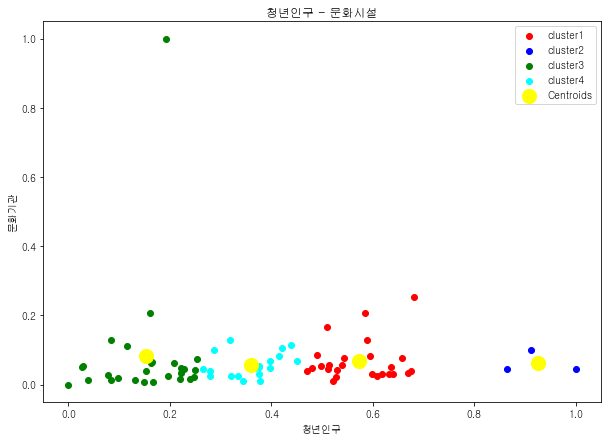

In [221]:
#청년인구와 행정기관의 값만 X_Cluture
X_Cluture = nol_df.iloc[:, [1,15]].values # shape=(75,2)
m_Cluture=X_Cluture.shape[0] # 집합 개수 (m=75)
n_Cluture=X_Cluture.shape[1] # 특징 개수 (n=2)

K = 4 #클러스터 갯수
n_iter = 200 #반복횟수

Centroids=np.array([]).reshape(n_Cluture,0) # 클러스터 중심 초기화  # shape=(2, 0)
for i in range(K): # 0, 1, 2, 3
    rand=rd.randint(0,m_Cluture-1) # 0과 74 사이 난수 생성
    Centroids=np.c_[Centroids,X_Cluture[rand]] # 클러스터 중심(열) 추가
# K개 클러스터 중심 초기값
Output={} #출력값 초기화

for i in range(n_iter): # n_iter 반복 횟수
    # 유클리드 거리가 최소가 되는 K 클러스터 할당
    EuclidianDistance=np.array([]).reshape(m_Cluture,0) 
    for k in range(K):     
        tempDist=np.sum((X_Cluture-Centroids[:,k])**2,axis=1) # shape=(75,)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist] # shape=(75, 3)
    C=np.argmin(EuclidianDistance,axis=1)+1 # shape=(75,)
    # K 클러스터 갱신
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0) # Y 딕셔너리 키, 값 할당
    for i in range(m_Cluture):
        Y[C[i]]=np.c_[Y[C[i]],X_Cluture[i]] # Y 딕셔너리 키(K클러스터), 값(청년인구, 문화기관) 할당
    for k in range(K):
        Y[k+1]=Y[k+1].T # 전치행렬
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0) # K 클러스터 중심 갱신
    Output=Y
    
plt.figure(figsize=(10,7))
    
#할때마다 군집의 형태가 바뀜
color=['red','blue','green','cyan']
labels=['cluster1','cluster2','cluster3','cluster4']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k]) #각 데이터의 점 찍기
plt.scatter(Centroids[0,:],Centroids[1,:],s=200,c='yellow',label='Centroids') #Centroids 점 찍는 plt   
plt.title("청년인구 - 문화시설")
plt.xlabel('청년인구')
plt.ylabel('문화기관')
plt.legend()
plt.show()

# 계층적 군집분석

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd
from scipy.cluster.hierarchy import linkage, dendrogram

array([], dtype=float64)

In [153]:
#플롯에서 한글이 깨지는 경우가 없도록 폰트 지정
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

### 청년인구 - 숙박시설

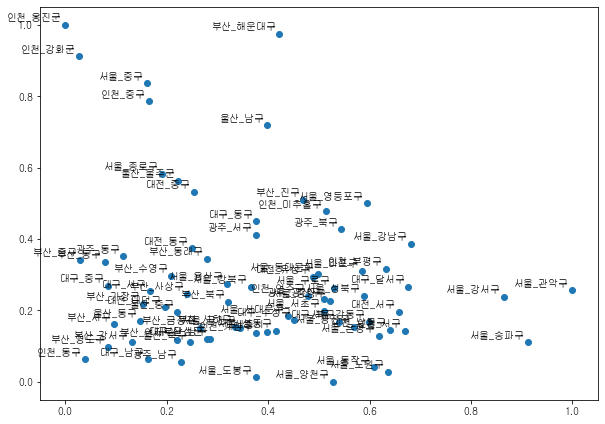

In [166]:
df_rest = nol_df.reindex(columns=['시군구','청년인구','숙박시설'])

#그래프 표시
labels = df_rest['시군구'] #라벨 갯수

plt.figure(figsize=(10, 7))

plt.subplots_adjust(bottom=0.1)

plt.scatter(df_rest['청년인구'],df_rest['숙박시설'], label='True Position')

for label, x, y in zip(labels, df_rest['청년인구'], df_rest['숙박시설']): #각 점의 주석 달아줌
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

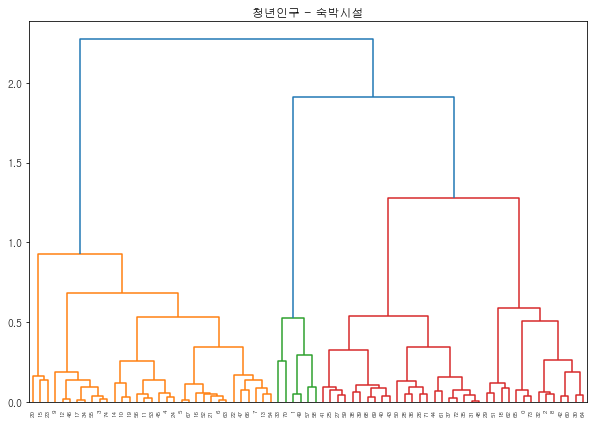

In [167]:
from scipy.cluster.hierarchy import dendrogram, linkage #계층적 군집분석시 필요
from matplotlib import pyplot as plt

#계층적 군집분석은 숫자형데이터만 들어가야되서 str타입의 시군구을 뺌
df_Den_rest = df_rest.reindex(columns=['청년인구','숙박시설'])

linked = linkage(df_Den_rest, 'single')

labelList = df_rest['시군구']


#아래의 표를 그려줌
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("청년인구 - 숙박시설")
dend = shc.dendrogram(shc.linkage(df_Den_rest, method='ward'))

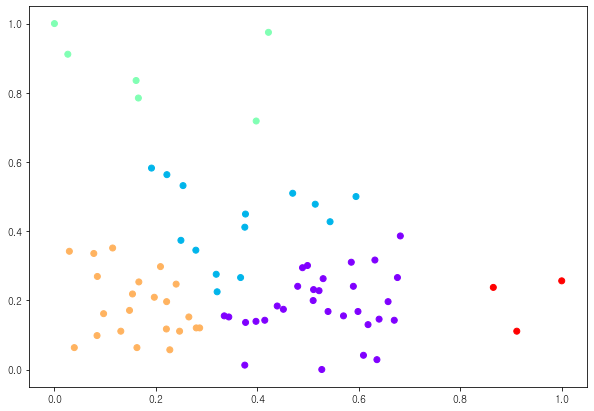

In [168]:
#군집분석 결과
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_Den_rest)

plt.figure(figsize=(10, 7))
plt.scatter(df_Den_rest['청년인구'], df_Den_rest['숙박시설'], c=cluster.labels_, cmap='rainbow')

### 청년인구 - 행정기관

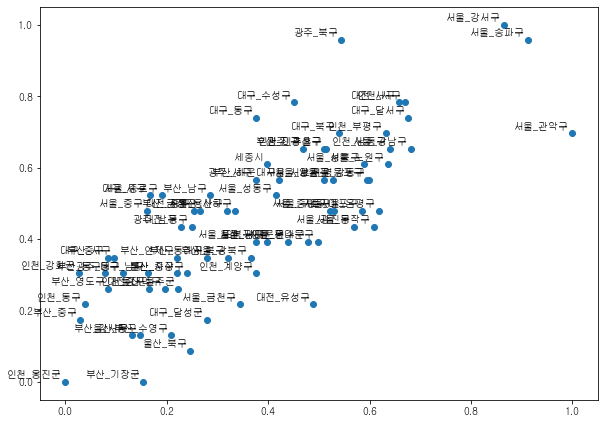

In [180]:
df_Exe = nol_df.reindex(columns=['시군구','청년인구','행정기관'])

#그래프 표시
labels = df_Exe['시군구'] #라벨 갯수

plt.figure(figsize=(10, 7))

plt.subplots_adjust(bottom=0.1)

plt.scatter(df_Exe['청년인구'],df_Exe['행정기관'], label='True Position') 

for label, x, y in zip(labels, df_Exe['청년인구'], df_Exe['행정기관']): #각 점의 주석 달아줌
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

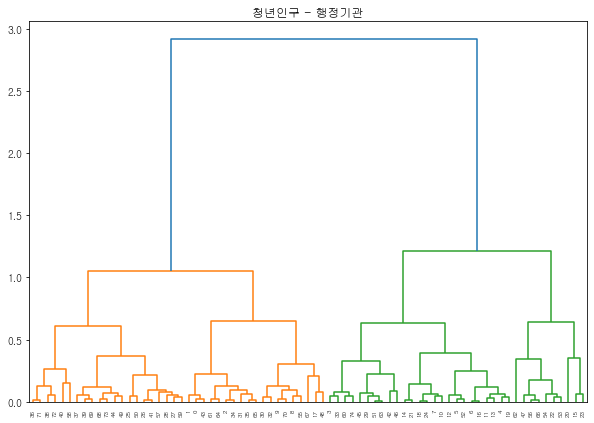

In [181]:
#계층적 군집분석은 숫자형데이터만 들어가야되서 str타입의 시군구을 뺌
df_Den_Exe = df_Exe.reindex(columns=['청년인구','행정기관'])

linked = linkage(df_Den_Exe, 'single')

labelList = df_Exe['시군구']

#아래의 표를 그려줌
plt.figure(figsize=(10, 7))
plt.title("청년인구 - 행정기관")
dend = shc.dendrogram(shc.linkage(df_Den_Exe, method='ward'))

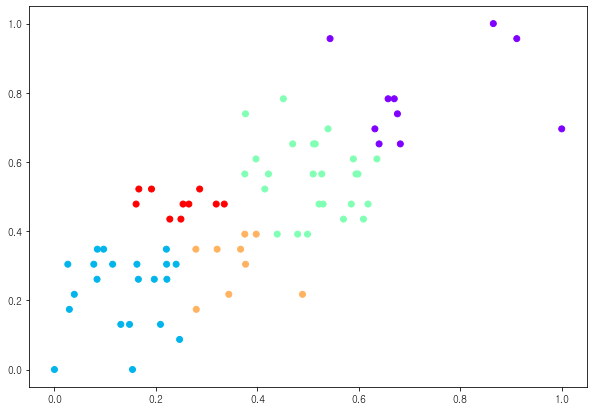

In [182]:
#군집분석 결과
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_Den_Exe)

plt.figure(figsize=(10, 7))
plt.scatter(df_Den_Exe['청년인구'], df_Den_Exe['행정기관'], c=cluster.labels_, cmap='rainbow')

### 청년인구 - 문화시설

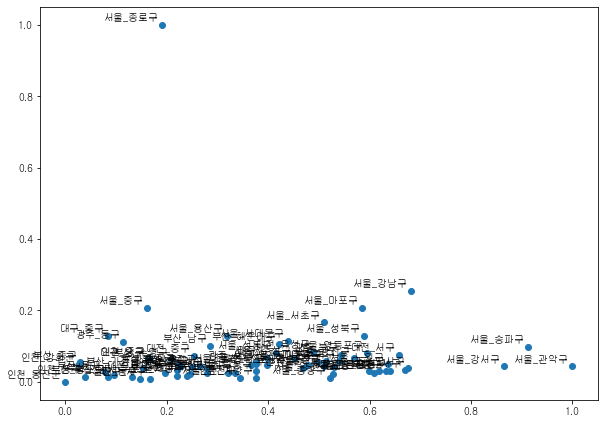

In [184]:
df_Cluture = nol_df.reindex(columns=['시군구','청년인구','문화시설_영화/공연/미술관박물관'])

#그래프 표시
labels = df_Cluture['시군구'] #라벨 갯수

plt.figure(figsize=(10, 7))

plt.subplots_adjust(bottom=0.1)

plt.scatter(df_Cluture['청년인구'],df_Cluture['문화시설_영화/공연/미술관박물관'], label='True Position')

#각 점의 주석 달아줌
for label, x, y in zip(labels, df_Cluture['청년인구'], df_Cluture['문화시설_영화/공연/미술관박물관']): 
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

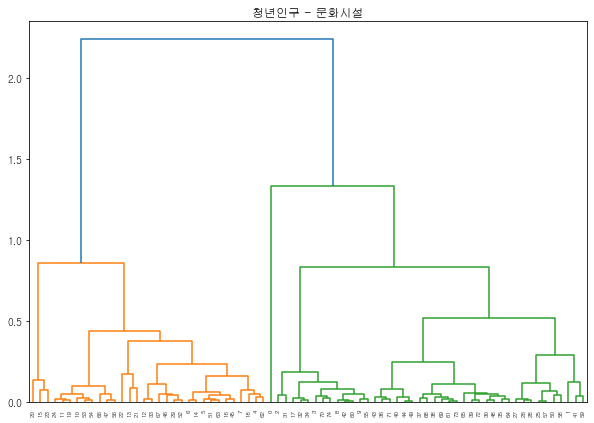

In [185]:
#계층적 군집분석은 숫자형데이터만 들어가야되서 str타입의 시군구을 뺌
df_Den_Cluture = df_Cluture.reindex(columns=['청년인구','문화시설_영화/공연/미술관박물관'])

linked = linkage(df_Den_Cluture, 'single')

labelList = df_Cluture['시군구']

#아래의 표를 그려줌
plt.figure(figsize=(10, 7))
plt.title("청년인구 - 문화시설")
dend = shc.dendrogram(shc.linkage(df_Den_Cluture, method='ward'))

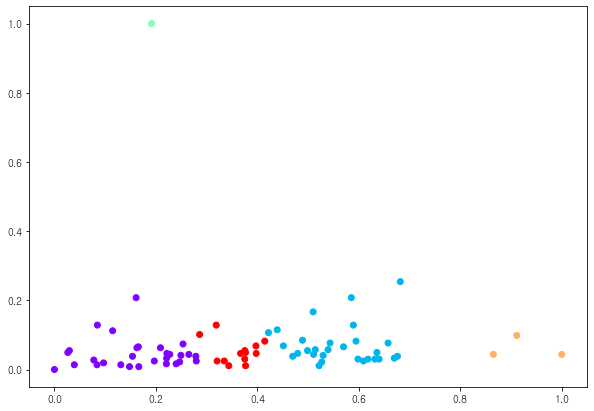

In [186]:
#군집분석 결과
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_Den_Cluture)

plt.figure(figsize=(10, 7))
plt.scatter(df_Den_Cluture['청년인구'], df_Den_Cluture['문화시설_영화/공연/미술관박물관'], c=cluster.labels_, cmap='rainbow')